In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Issues
# 1. join 2 dataframes by multiindexing. 

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
# Constants
seed = 42

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# EDA

In [7]:
# We discovered that the Cabin feature has 96% value missed. 
# Due to its large proportion of missing, we decide not to use this feature
# in our prediction because it will only cause noise and waste of time. 

In [8]:
train = train.drop('Cabin',axis = 1)
train = train.drop('Name',axis = 1)
train = train.drop('Ticket',axis = 1)
train = train.drop('PassengerId',axis = 1)
train = train.reset_index(drop=True)

In [9]:
# This method will show a bar graph that shows the percentage of survival
# by certain category.
# For example, survival_by('Sex') shows the bar chart with the survival rates of males and females
def survival_by(col):
    import matplotlib.pyplot as plt
    train[col] = train[col].fillna('missing')
    labels = train[col].sort_values().index
    
    
    
    
    eles = list(train[col].unique())
    survival_rate = []
    for ele in eles:
        rate = train.loc[train[col] == ele,'Survived']\
        .sum()/len(train.loc[train[col] == ele,'Survived'])
        survival_rate.append(rate)
    return plt.bar(eles,survival_rate)

### Survival Rate by Gender

<BarContainer object of 2 artists>

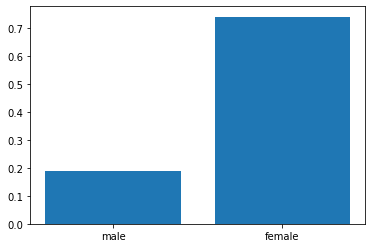

In [10]:
survival_by('Sex')

In [11]:
# On the other hand, for male, the odds of survival is about 19%
# The conclusion is that female is much more likely to survive. 

### Survival Rate at each age level 

Text(0.5, 1.0, 'Distribution of Ages')

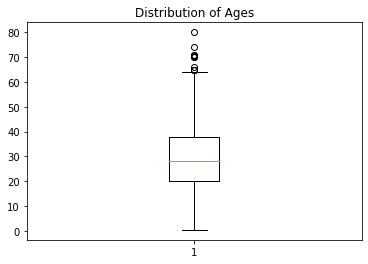

In [12]:
# Age and survival
# Ignore the missing values first
# Distribution of age
import matplotlib.pyplot as plt
plt.boxplot(train[train['Age'].notnull()]['Age'])
plt.title('Distribution of Ages')

In [13]:
# Based on the above boxplot, we define 3 age groups: 0-20,21-40,40-100, 
# name them as young, adult, elders

In [14]:
train.loc[train.Age<21,'Age_group'] = 'youth'
train.loc[(train.Age>20) & (train.Age <41),'Age_group']= 'adult'
train.loc[train.Age >40,'Age_group'] = 'elder'
train.Age_group = train['Age_group'].fillna('missing')

Text(0.5, 1.0, 'Survival Rates among Age Groups')

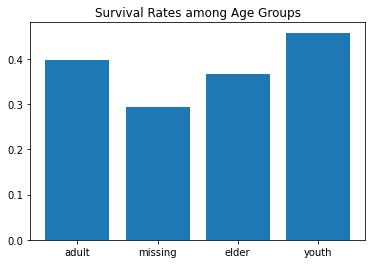

In [15]:
# Survival rate by each age group
survival_by('Age_group')
plt.title('Survival Rates among Age Groups')

In [16]:
# Younger ones seems more likely to survive.

### Survival Rate at Each Age Level across Gender

In [32]:
women.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
1,1,1,female,38.0,1,0,71.2833,C,adult
2,1,3,female,26.0,0,0,7.9250,S,adult
3,1,1,female,35.0,1,0,53.1000,S,adult
8,1,3,female,27.0,0,2,11.1333,S,adult
9,1,2,female,14.0,1,0,30.0708,C,youth


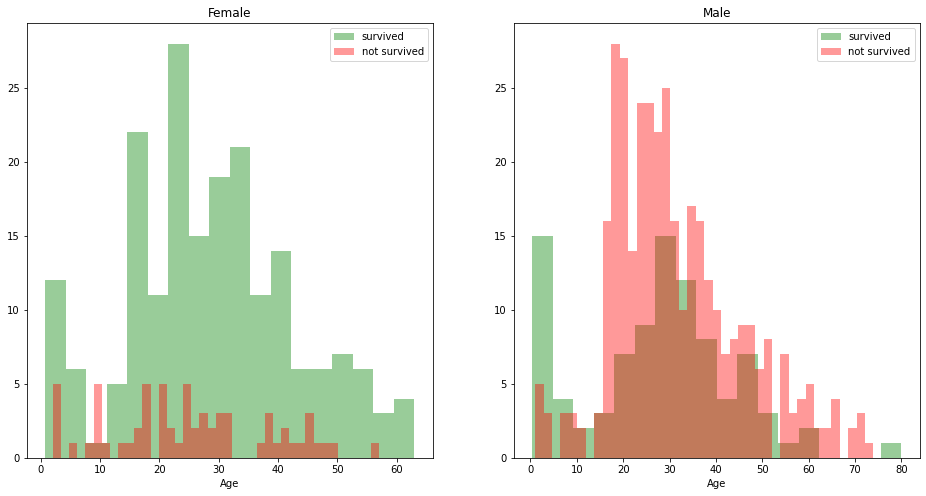

In [23]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="green")
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Male');

In [ ]:
# We discover that at all ages women are more likely to survive.

### Survival Rate by Pclass and Age

Text(0.5, 1.0, 'Pclass3')

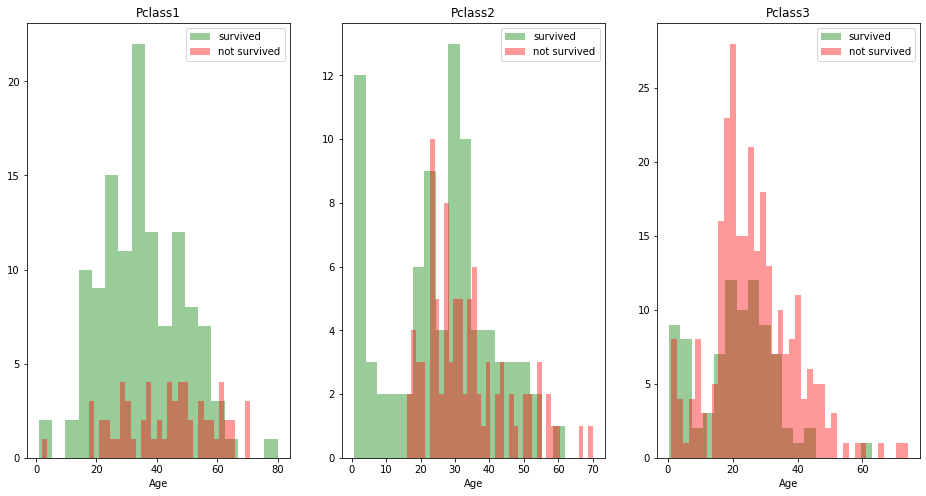

In [30]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 8))
class1 = train[train['Pclass']==1]
class2 = train[train['Pclass']==2]
class3 = train[train['Pclass']==3]

ax = sns.distplot(class1[class1['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="green")
ax = sns.distplot(class1[class1['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Pclass1')

ax = sns.distplot(class2[class2['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde =False, color="green")
ax = sns.distplot(class2[class2['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde =False, color="red")
ax.legend()
ax.set_title('Pclass2');

ax = sns.distplot(class3[class3['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[2], kde =False, color="green")
ax = sns.distplot(class3[class3['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[2], kde =False, color="red")
ax.legend()
ax.set_title('Pclass3')

In [ ]:
# Among all ages, Class 1 has more possibility to survive that class 2, then class 3. 

### Survival Rate Group by Embarked Position and Pclass

Text(0.5, 1.0, 'Queenstown')

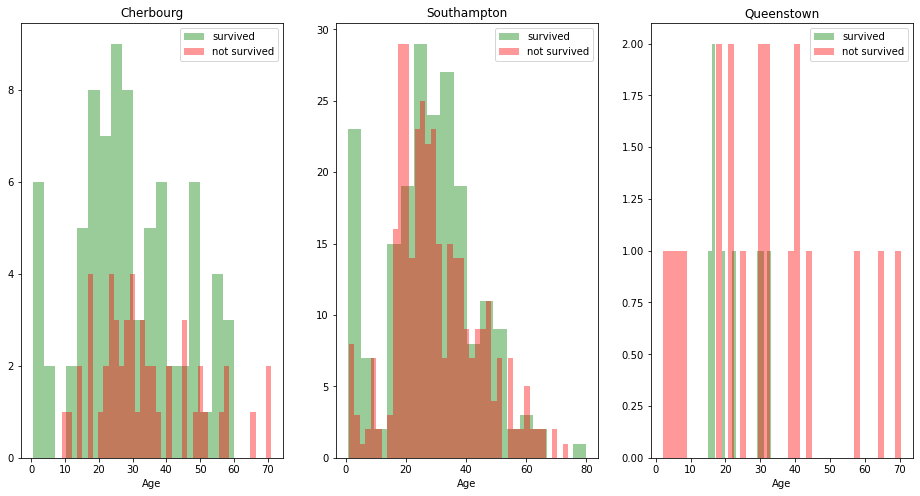

In [36]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 8))
C = train[train['Embarked']=='C']
S = train[train['Embarked']=='S']
Q = train[train['Embarked']=='Q']

ax = sns.distplot(C[C['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="green")
ax = sns.distplot(C[C['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Cherbourg')


ax = sns.distplot(S[S['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde =False, color="green")
ax = sns.distplot(S[S['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde =False, color="red")
ax.legend()
ax.set_title('Southampton')

ax = sns.distplot(Q[Q['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[2], kde =False, color="green")
ax = sns.distplot(Q[Q['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[2], kde =False, color="red")
ax.legend()
ax.set_title('Queenstown')


In [ ]:
# The result shows that passengers embarked at Cherbourg are more likely to survive.
# Passengers from Southampton are less likely to survive, many of dead cases are from people under 20.
# There are not many passengers coming from Queenstown, and many of them are likely to die. 

### Survival Rates by Relationship

In [37]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<BarContainer object of 7 artists>

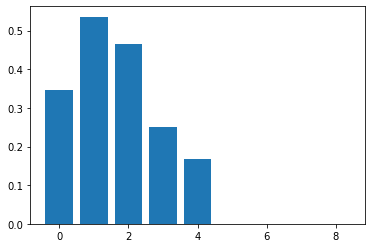

In [38]:
survival_by('SibSp')

In [ ]:
# People have 1 siblings or spouse are most likely to survive.

In [ ]:
# Dummify variables
for col in train.columns:
    if train[col].dtype == 'O':
        train[col] = pd.get_dummies(train[col])
train.head()

In [ ]:
#Fillna with -9999
train = train.fillna(-9999)

In [ ]:
# Train validation split
from sklearn.model_selection import train_test_split

X = train.iloc[:,1:]
y = train.iloc[:,0]

x_train, x_test,y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = seed)

In [ ]:
# Try no dealing with missing data


In [ ]:
# Model 1 XGB
import xgboost as xgb
import optuna

In [ ]:
import sklearn
from xgboost import XGBClassifier
def objective(trial):
    dtrain = xgb.DMatrix(x_train,label = y_train)
    dtest = xgb.DMatrix(x_test,label = y_test)
    num_round = 1000
    param = {
        "eta": trial.suggest_float('eta',1e-3, 0.3),
        "objective": "binary:logistic",
        "eva_metric":'auc',
        "max_depth": trial.suggest_int('max_depth',4,16),
        "subsample": trial.suggest_float('subsample',0.5,1),
        "lambda":trial.suggest_float('lambda',1,3),
        'feature_fraction':trial.suggest_float('feature_fraction',0.5,1),
        "missing":-9999
    }
    
    #pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc")
    bst = xgb.train(param, dtrain, evals=[(dtest, "validation")])
    preds = bst.predict(dtest)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred_labels)
    return accuracy

In [ ]:
if __name__ == "__main__":
    study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize"
    )
    study.optimize(objective, n_trials=100)
    print(study.best_trial)

In [ ]:
params={'eta': 0.001832623843952462, 'max_depth': 4, 'subsample': 0.8827284715195801, 'lambda': 7.80011028366904}

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
num_round = 100
dtrain = xgb.DMatrix(x_train,label = y_train)
dtest = xgb.DMatrix(x_test,label = y_test)
clf = xgb.XGBClassifier(**params)
kfold = StratifiedKFold(n_splits = 5)
results = cross_val_score(clf,x_train,y_train,cv = kfold)
avg_results = results.sum()/5

In [ ]:
# Best XGB can do
avg_results

In [ ]:
num_rounds = 10
bst = xgb.train(params,dtrain,num_rounds)

In [ ]:
xgb.plot_importance(bst)

In [ ]:
import lightgbm as lgb
lgb_train = lgb.Dataset(x_train,y_train)
lgb_test = lgb.Dataset(x_test,y_test)

In [ ]:
# Model 2 LightGBM
import lightgbm as lgb
def lightgbm_objective(trial):
    lgb_train = lgb.Dataset(x_train,y_train)
    lgb_test = lgb.Dataset(x_test,y_test)
    param = {
        'boost_type': trial.suggest_categorical('boost_type',['dart','gbdt']),
        "eta": trial.suggest_float('eta',1e-3, 0.3),
        "objective": "binary:logistic",
        "eva_metric":'auc',
        "max_depth": trial.suggest_int('max_depth',4,16),
        "subsample": trial.suggest_float('subsample',0.5,1),
        "lambda":trial.suggest_float('lambda',1,20),
        'feature_fraction':trial.suggest_float('feature_fraction',0.5,1),
        "num_boost_round":trial.suggest_int('num_boost_round',20,100)
    }
    
    #pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc")
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_test,
             )
    preds = gbm.predict(x_test,num_iteration = gbm.best_iteration)
    accuracy = sklearn.metrics.accuracy_score([int(round(x)) for x in preds],y_test)
    return accuracy

In [ ]:
if __name__ == "__main__":
    study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize"
    )
    study.optimize(lightgbm_objective, n_trials=80)
    print(study.best_trial)

In [ ]:
params={'boost_type': 'dart', 'eta': 0.21195106328946775, 'max_depth': 9, 'subsample': 0.6526587206109331, 'lambda': 11.46556912870986, 'feature_fraction': 0.8104196182900097, 'num_boost_round': 88}

In [ ]:
from sklearn.metrics import accuracy_score
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_test,
             )
preds = gbm.predict(x_test,num_iteration = gbm.best_iteration)
accuracy = sklearn.metrics.accuracy_score([int(round(x)) for x in preds],y_test)
accuracy

In [ ]:
# Cross validation score
lgb.cv(params = params,train_set = lgb_train,metrics = 'auc',nfold = 3)

In [ ]:
lgb.plot_importance(gbm)

In [ ]:
y_train.to_numpy()

In [ ]:
x_train.dtypes

In [ ]:
# Neural Network


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
# Model
nn_model = tf.keras.Sequential()
nn_model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
nn_model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
nn_model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
nn_model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
nn_model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
nn_model.fit(x_train,y_train, epochs=100)
test_loss, test_acc = nn_model.evaluate(x_test,y_test, verbose=2)

In [ ]:
# predict test set
# Imputation and preprocessing
test = test.drop('Cabin',axis = 1)
test = test.drop('Name',axis = 1)
test = test.drop('Ticket',axis = 1)
test = test.drop('PassengerId',axis = 1)
# Dummify variables
for col in test.columns:
    if test[col].dtype == 'O':
        test[col] = pd.get_dummies(test[col])
# Fillna
test = test.fillna(-9999)

In [ ]:
# XGB Predict
test_xgb = xgb.DMatrix(test)

pred_xgb = bst.predict(test_xgb)
pred_xgb = [round(x) for x in pred_xgb]

In [ ]:
# Lightgbm Predict
test_lgb = lgb.Dataset(test)
pred_lgb = gbm.predict(test)
pred_lgb = [round(x) for x in pred_lgb]

In [ ]:
test

In [ ]:
# NN Predict
pred_nn = nn_model.predict(test)
pred_nn = [int(round(x)) for x in pred_nn.flat[:]]

In [ ]:
pred_nn

In [ ]:
# Ensemble models by voting
Results = [round((a+b+c)/3) for (a,b,c) in zip(pred_nn,pred_lgb,pred_xgb)]


In [ ]:
sub = pd.read_csv('/kaggle/input/titanic/test.csv')
sub['Survived'] = [int(x) for x in Results]
sub = sub[['PassengerId','Survived']]

In [ ]:
my_sub = sub.to_csv('my_sub.csv',index = False)

In [ ]:
# Compare results:
np.subtract(pred_xgb,pred_nn)